In [1]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

In [2]:
# Digital Imaging and Communications in Medicine (DICOM)
import imageio

dir_path = "../data/study#2/volumetric-dicom/2-LUNG 3.0  B70f-04083"
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 99/99  (100.0%)


(99, 512, 512)

In [3]:
vol = torch.from_numpy(vol_arr).float() # numpy to tensor 부터 캐스팅까지 한번에 수행
vol = torch.unsqueeze(vol, 0)
vol.shape

torch.Size([1, 99, 512, 512])

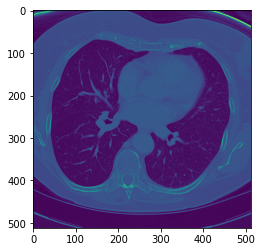

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(vol_arr[50])

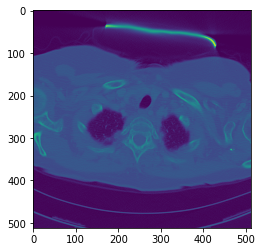

In [5]:
plt.imshow(vol_arr[10])

In [10]:
from matplotlib import animation
from IPython.display import HTML

fig = plt.figure(figsize=(8,8))
im = plt.imshow(vol_arr[0,:,:])
plt.close() # this is required to not display the generated image

def init():
    im.set_data(vol_arr[0,:,:])
def animate(i):
    im.set_data(vol_arr[i,:,:])
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=vol_arr.shape[0], interval=30)
HTML(anim.to_html5_video())